In [3]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import os, sys
import squidpy as sq

In [4]:
od = '/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/1.3_cellbin_co_occurrence/regions/'
os.chdir(od)

In [5]:
import yaml
with open('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/sample.yaml', 'r') as file:
    sample_dict = yaml.safe_load(file)
samplelist = list(sample_dict.keys())
samplelist

['SS200000118TL_C1',
 'SS200000148TR_D1',
 'SS200000131TR_C4',
 'SS200000133TL_C4',
 'SS200000148TR_E6',
 'SS200000495BR_B1',
 'SS200000495BR_B2',
 'SS200000495BR_C5',
 'SS200000495BR_D5',
 'SS200000495BR_E3',
 'SS200000495BR_B5']

In [6]:
adata = sc.read(
    "/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/1.1_cellbin_rawdata/filtered_data/merged_adata2.h5ad"
)

In [ ]:
# adata=adata_all[adata_all.obs['batch'] == sample]

In [7]:
sc.set_figure_params(facecolor="white", figsize=(4, 4))
sc.settings.verbosity = 3
sc.settings.dpi = 300
sc.settings.figdir = "./figures"

In [8]:
region_map = {
    "Tumor_Cell_region_1": 'TCR1',
    'Tumor_Cell_region_2': 'TCR2',
    'Tumor_Cell_region_3': 'TCR3',
    'Tumor_Cell_region_4': 'TCR4',
    'Tumor_around_region_1': 'TAR1',
    'Tumor_around_region_2': 'TAR2',
    'Tumor_around_region_3': 'TAR3',
    'Tumor_around_region_4': 'TAR4',
    'Tumor_around_region_5': 'TAR5',
    'Mesenchymal_Cell_region_1': 'MCR1',
    'Mesenchymal_Cell_region_2': 'MCR2',
    'Mesenchymal_Cell_region_3': 'MCR3',
    'ADM_region_1': 'ADR1',
    'ADM_region_2': 'ADR2',
    'ADM_region_3': 'ADR3',
    'ADM_region_4': 'ADR4',
    'Acinar_Cell_region':'ACR',
    'Immune_Cell_region':'ICR',
}
adata.obs['region'] = adata.obs['community_type'].map(region_map)

In [8]:
sq.gr.spatial_neighbors(adata,coord_type='generic',library_key='batch',radius=30)
sq.gr.nhood_enrichment(adata, cluster_key="region")
score = adata.uns['region_nhood_enrichment']['zscore']
adata.uns['region_nhood_enrichment']['zscore'] = np.nan_to_num(score)

Creating graph using `generic` coordinates and `None` transform and `11` libraries.


/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/squidpy/src/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/anndata/_core/an

Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:58)


/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/squidpy/src/squidpy/gr/_utils.py:141: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[key]):


Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['region_nhood_enrichment']`
Finish (0:02:15)


In [8]:
adata

AnnData object with n_obs × n_vars = 1816697 × 20127
    obs: 'orig.ident', 'x', 'y', 'P2_Tum_1', 'P14_NMF_9_14', 'P14_ALB_NMF_3', 'T_CD8_GZMK_NMF_7', 'P12_NMF_8', 'P12_PCDHG_NMF_29', 'P12_HLA−DRB1_NMF_9', 'P12_NMF_18', 'B_IGHD_NMF_1', 'T_CD4NV_CM_rest_NMF_8', 'P14_CD55_NMF_15', 'P12_ATF3_NMF_10', 'P20_IFITM2_NMF_4', 'T_CD4_unknown_NMF_12', 'P12_MMP7_NMF_20', 'T_CD8_KLRC1_NMF12', 'Fibro_CFD_NMF_3_6_17', 'T_CD4_IL2RA_NMF_10', 'T_CD4_unknown_NMF_9', 'P14_PLAT_NMF_10', 'P20_FN1_NMF_14', 'P20_CST6_NMF_3', 'P14_NMF_16_18', 'T_CD8_CXCL13_NMF_17', 'NK_NMF_5', 'T_HSPA1A_NMF_19', 'B_AIM2_NMF_2', 'P12_HLA−DRB1_NMF_15', 'Macro_SPP1_NMF_7_23', 'T_CD8_PRSS1_NMF_20', 'Fibro_APOD_NMF_5', 'Endo_CD36_NMF_13_16', 'Macro_CPM_NMF_13', 'Macro_CD1A_NMF_5_6', 'P12_NMF_17_23', 'PVL_NMF_7_18', 'P14_cycling_NMF_23', 'P2_PCDHGC3_NMF_29', 'NK_PRSS1_NMF_15', 'P12_NMF_19', 'Macro_NMF_3', 'Macro_NMF_4', 'P14_NMF_12', 'Endo_ACKR1_NMF_14', 'P1_AQP3', 'mastCell', 'Endo_EDN1_NMF_22', 'Macro_C3_NMF_11', 'Fibro_COL11A1_NM

In [9]:
region_number = adata.obs['region'].value_counts()[adata.obs['region'].cat.categories]
nhood_counts = pd.DataFrame(adata.uns['region_nhood_enrichment']['count'], index=adata.obs['region'].cat.categories, columns=adata.obs['region'].cat.categories)
nhood_percents = nhood_counts/region_number
nhood_percents

,ACR,ADR1,ADR2,ADR3,ADR4,ICR,MCR1,MCR2,MCR3,TAR1,TAR2,TAR3,TAR4,TAR5,TCR1,TCR2,TCR3,TCR4
ACR,3.907806,0.133115,0.000000,0.000000,0.000534,0.000000,0.000000,0.000000,0.000000,0.007439,0.000000,0.000000,0.000000,0.000000,0.000009,0.016115,0.008436,0.000000
ADR1,0.029108,4.169285,0.156512,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.017218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ADR2,0.000000,0.257443,4.252183,0.172225,0.000141,0.000000,0.000000,0.000000,0.000000,0.023464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ADR3,0.000000,0.000275,0.288782,4.087925,0.202759,0.000050,0.000000,0.000008,0.000000,0.073713,0.000000,0.000000,0.000443,0.000000,0.000000,0.000000,0.000000,0.000000
ADR4,0.000342,0.000000,0.000250,0.215430,3.588446,0.122145,0.000015,0.000236,0.000000,0.046296,0.000000,0.000000,0.042122,0.000017,0.000000,0.000015,0.000000,0.000000
ICR,0.000000,0.000000,0.000000,0.000090,0.206330,3.861544,0.000193,0.092186,0.000000,0.000047,0.000000,0.000000,0.058892,0.000017,0.000000,0.000000,0.000000,0.000000
MCR1,0.000000,0.000000,0.000000,0.000000,0.000019,0.000144,2.272014,0.111538,0.000012,0.000000,0.000000,0.000040,0.015015,0.085776,0.000000,0.000000,0.000000,0.000077
MCR2,0.000000,0.000000,0.000000,0.000020,0.000553,0.127920,0.207016,2.535190,0.070400,0.000000,0.000059,0.030668,0.068897,0.058226,0.000000,0.000000,0.000000,0.000019
MCR3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.024221,2.410826,0.000000,0.000079,0.068426,0.000000,0.000084,0.000000,0.000000,0.000000,0.000000
TAR1,0.001910,0.020213,0.016747,0.031376,0.018547,0.000011,0.000000,0.000000,0.000000,3.842094,0.000000,0.000000,0.061326,0.000101,0.000000,0.114240,0.000000,0.039069


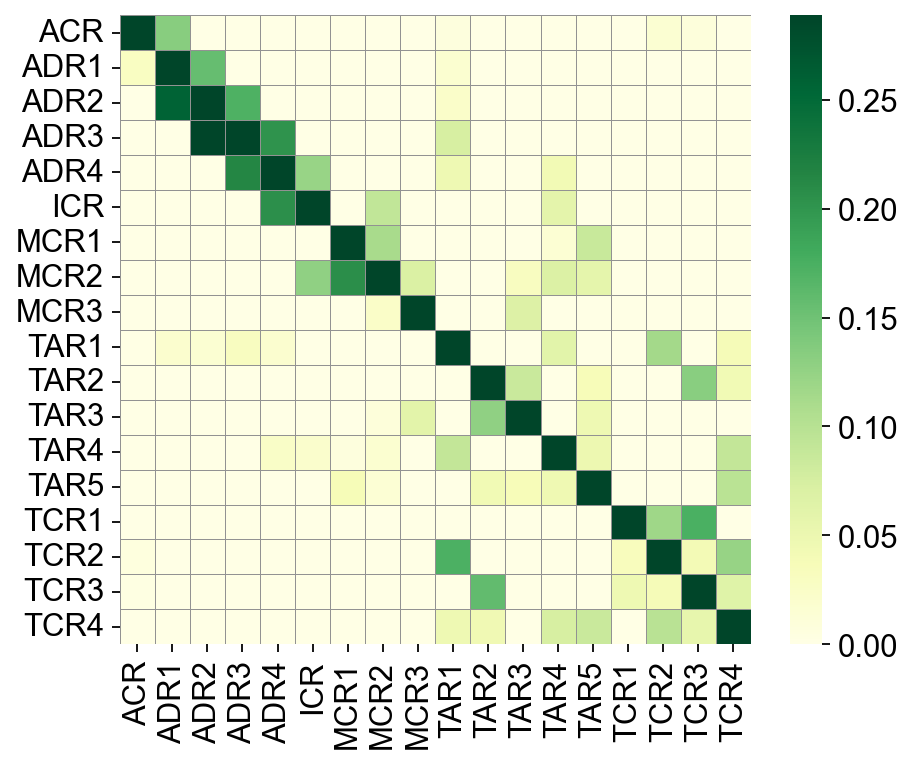

In [16]:
df = nhood_percents.copy()
index_list = df.index.tolist()
# Remove the numbers on the diagonal
df = df.mask(np.eye(len(df), dtype=bool))
# the numbers on the diagonal equal to max value in the matrix
df = df.mask(np.eye(len(df), dtype=bool), df.max().max())
# zscore df
# df = (df - df.mean()) / df.std()
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 5))
# set grid line off
ax.grid(False)
g = sns.heatmap(df, cmap="YlGn", linewidth=0.3, linecolor="#929292", ax=ax)
# set the NA value as grey color
ax.set_facecolor("#dcdcdc")
plt.savefig("region_nhood_heatmap.pdf", dpi=300, bbox_inches="tight")

In [ ]:
# plot celltype nhood heatmap for each sample 
fig,ax = plt.subplots(3,4,figsize=(24,15))
# rename 'PVL_Cell' to 'Fibroblast_Cell'
adata.obs['celltype'] = adata.obs['celltype'].replace('PVL_Cell','Fibroblast_Cell')
import seaborn as sns
for i,sample in enumerate(samplelist):
    axi = ax.flatten()[i]
    adata_tmp = adata[adata.obs['batch'] == sample].copy()
    sq.gr.spatial_neighbors(adata_tmp,coord_type='generic',radius=30)
    sq.gr.nhood_enrichment(adata_tmp, cluster_key="celltype")
    score = adata_tmp.uns['celltype_nhood_enrichment']['zscore']
    adata_tmp.uns['celltype_nhood_enrichment']['zscore'] = np.nan_to_num(score)
    celltype_number = adata_tmp.obs['celltype'].value_counts()[adata_tmp.obs['celltype'].cat.categories]
    nhood_counts = pd.DataFrame(adata_tmp.uns['celltype_nhood_enrichment']['count'], index=adata_tmp.obs['celltype'].cat.categories, columns=adata_tmp.obs['celltype'].cat.categories)
    nhood_percents = nhood_counts/celltype_number
    df = nhood_percents.copy()
    index_list = df.index.tolist()
    # Remove the numbers on the diagonal
    df = df.mask(np.eye(len(df), dtype=bool))
    # the numbers on the diagonal equal to max value in the matrix
    df = df.mask(np.eye(len(df), dtype=bool), df.max().max())
    # zscore df
    # df = (df - df.mean()) / df.std()
    import seaborn as sns
    g = sns.heatmap(df,cmap='YlGn',linewidth=.3,linecolor='#929292',ax=axi)
    # set title
    axi.set_title(sample_dict[sample])
plt.savefig(f'celltype_nhood_heatmap_{sample_dict[sample]}.pdf', dpi=300 ,bbox_inches='tight')

    
    

normalizing counts per cell


    finished (0:00:01)


meta NOT subset; don't know how to subset; dropped


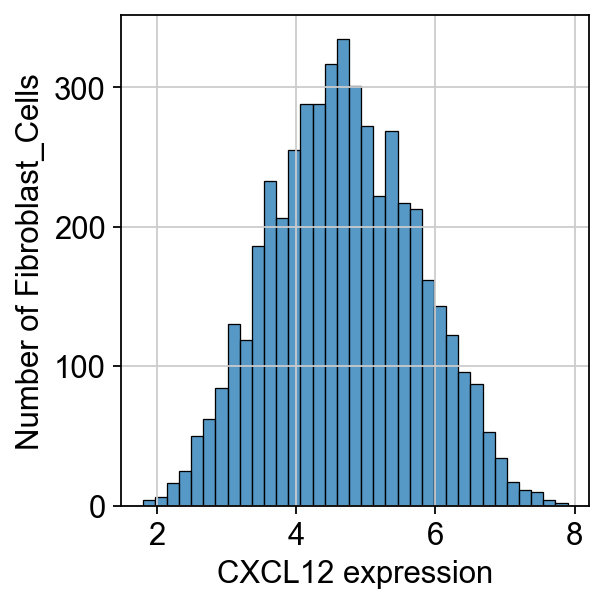

In [54]:
import seaborn as sns
adata.obs['celltype'].value_counts()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.obs['celltype'] = adata.obs['celltype'].replace('PVL_Cell','Fibroblast_Cell')
adata_caf = adata[adata.obs['celltype'] == 'Fibroblast_Cell'].copy()
# define CXCL12+ Fibroblast as expression of CXCL12 > 0.75 percentile of all Fibroblast_Cells
fibroblast_cxcl12_expression = sc.get.obs_df(adata_caf,'CXCL12')
fibroblast_cxcl12_expression = fibroblast_cxcl12_expression[fibroblast_cxcl12_expression > 0]
# plot the distribution of CXCL12 expression
fig,ax = plt.subplots(figsize=(4,4))
sns.histplot(fibroblast_cxcl12_expression,ax=ax)
ax.set_xlabel('CXCL12 expression')
ax.set_ylabel('Number of Fibroblast_Cells')
plt.savefig('fibroblast_cxcl12_expression.pdf', dpi=300 ,bbox_inches='tight')
# get top 25% expr CXCL12 cells
cxcl12_pct75 = np.percentile(fibroblast_cxcl12_expression,25)

normalizing counts per cell
    finished (0:00:01)


meta NOT subset; don't know how to subset; dropped


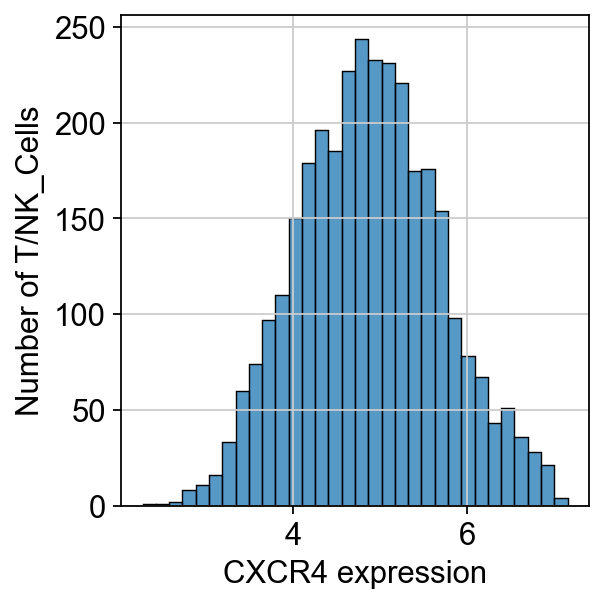

In [7]:
import seaborn as sns
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.obs['celltype'] = adata.obs['celltype'].replace('PVL_Cell','Fibroblast_Cell')
adata_tnk = adata[adata.obs['celltype'] == 'T/NK_Cell'].copy()
# define CXCL12+ Fibroblast as expression of CXCL12 > 0.75 percentile of all Fibroblast_Cells
tnk_cxcr4_expression = sc.get.obs_df(adata_tnk,'CXCR4')
tnk_cxcr4_expression = tnk_cxcr4_expression[tnk_cxcr4_expression > 0]
# plot the distribution of CXCL12 expression
fig,ax = plt.subplots(figsize=(4,4))
sns.histplot(tnk_cxcr4_expression,ax=ax)
ax.set_xlabel('CXCR4 expression')
ax.set_ylabel('Number of T/NK_Cells')
plt.savefig('TNK_CXCR4_expression.pdf', dpi=300 ,bbox_inches='tight')

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_utils.py:292: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
meta NOT subset; don't know how to subset; dropped
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


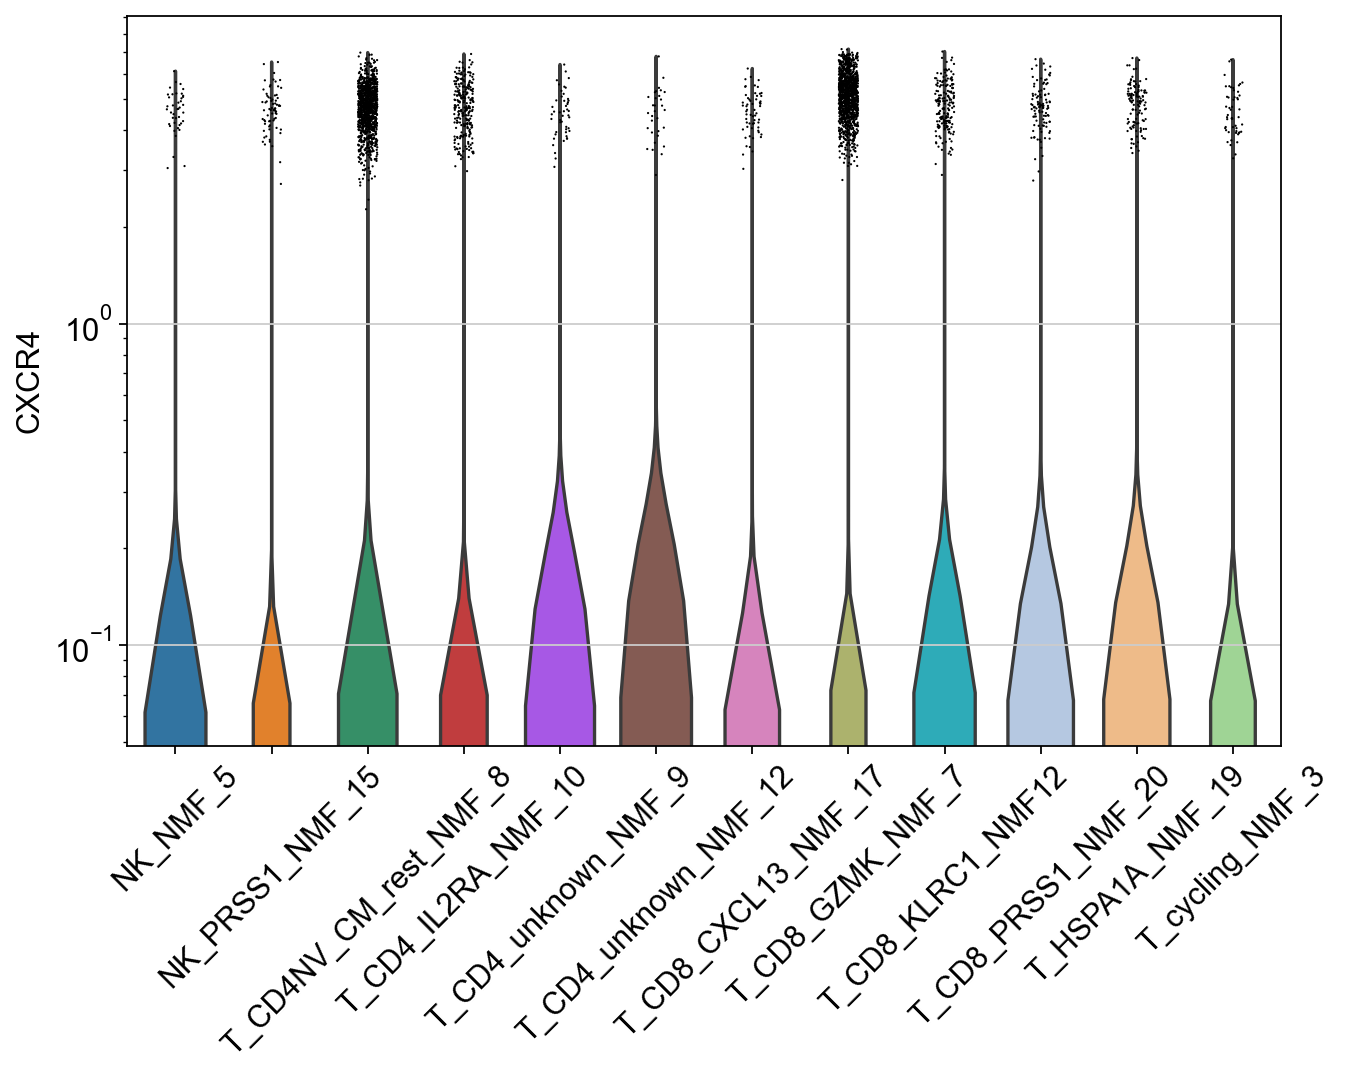

In [14]:
sc.set_figure_params(facecolor="white", figsize=(8, 6))
sc.pl.violin(adata_tnk, ['CXCR4'], groupby='cellsubtype',rotation=45,log=True, save='TNK_CXCR4_expression.pdf',figsize=(8,6))

In [17]:
adata_T = sc.read('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/yixianai/SC_reanalysis/result/3_cluster/Tcell/seurat_obj.h5ad')
rename_dict = {
    'T_CD8_GZMK_NMF_7': 'T_CD8_Cytotoxic',
    'T_CD4NV_CM_rest_NMF_8': 'T_CD4_NV_rest',
    'T_CD4_unknown_NMF_12': 'T_CD4_CD8_rest',
    'T_CD8_KLRC1_NMF12': 'T_CD8_KLRC1',
    'T_CD4_IL2RA_NMF_10': 'T_Exhaust',
    'T_CD4_unknown_NMF_9': 'T_CD4_CD8_rest',
    'T_CD8_CXCL13_NMF_17': 'T_CD8_Cytokine',
    'NK_NMF_5': 'NK_NV',
    'T_HSPA1A_NMF_19': 'T_HSPA1A',
    'T_CD8_PRSS1_NMF_20': 'T_CD8_PRSS1',
    'NK_PRSS1_NMF_15': 'NK_Cytotoxic',
    'T_cycling_NMF_3': 'T_cycling'
}
adata_T.obs['cellsubtype_rename'] = adata_T.obs['cellsubtype'].map(rename_dict)

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_utils.py:292: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
meta NOT subset; don't know how to subset; dropped
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


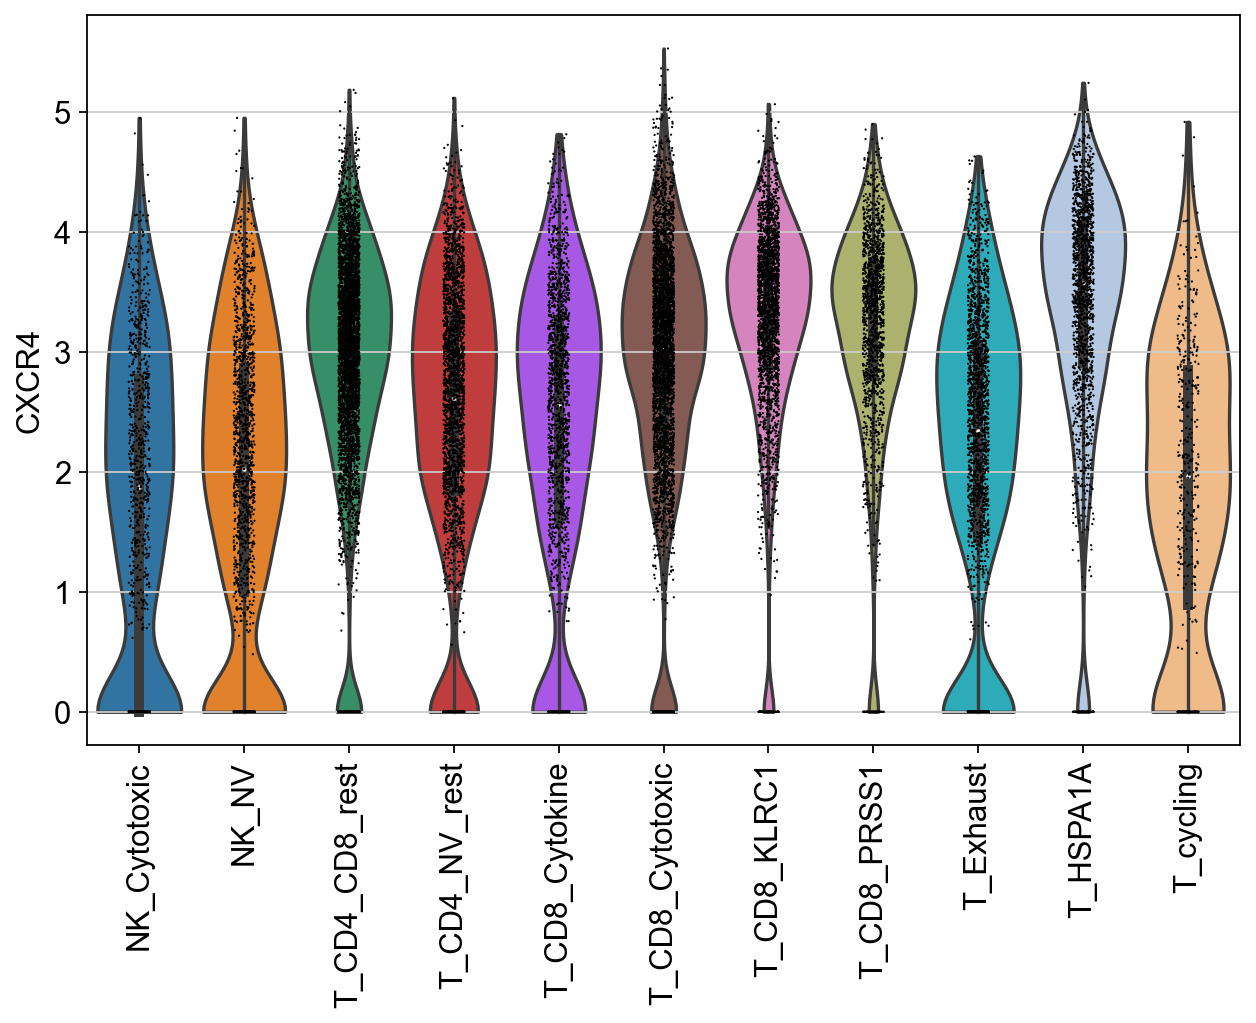

In [24]:
sc.pl.violin(adata_T, ['CXCR4'], groupby='cellsubtype_rename',rotation=90,log=False,inner='box', save='T_CXCR4_ITGB1_expression.pdf',figsize=(8,6))


In [55]:
cxcl12_caf = adata_caf [(adata_caf [:,'CXCL12'].X.toarray()>=cxcl12_pct75).flatten(), : ]
cell_cxcl12_caf = cxcl12_caf.obs_names
# fibroblast cell exprs CXCL12 > 2 mark as 'CXCL12+ Fibro' in adata.obs['celltype']
adata.obs['celltype_new'] = adata.obs['celltype']
adata.obs['celltype_new'] = adata.obs['celltype_new'].cat.add_categories(['CXCL12+ Fibro'])
adata.obs.loc[cell_cxcl12_caf,'celltype_new'] = 'CXCL12+ Fibro'
# Other Fibroblast_Cells mark as 'CXCL12- Fibro'
adata.obs['celltype_new'] = adata.obs['celltype_new'].cat.add_categories(['CXCL12- Fibro'])
adata.obs.loc[adata.obs['celltype_new'] == 'Fibroblast_Cell','celltype_new'] = 'CXCL12- Fibro'


In [68]:
adata.obs['celltype_new'].value_counts()

Tumor_Cell          462803
CXCL12- Fibro       401274
T/NK_Cell           210945
Acinar_Cell         209847
Macrophage_Cell     139688
B_Cell              101989
Endothelial_Cell     89519
Duct_like_Cell       86255
Plasma_Cell          30319
Endocrine_Cell       27807
Duct_Cell            23283
Mast_Cell            21756
Nerve_Cell            7583
CXCL12+ Fibro         3629
Name: celltype_new, dtype: int64

In [58]:
adata.obs['celltype_new'] = adata.obs['celltype_new'].cat.remove_unused_categories()

In [59]:
sq.gr.spatial_neighbors(adata,coord_type='generic',library_key='batch',radius=30)
sq.gr.nhood_enrichment(adata, cluster_key="celltype_new")
score = adata.uns['celltype_new_nhood_enrichment']['zscore']
adata.uns['celltype_new_nhood_enrichment']['zscore'] = np.nan_to_num(score)

Creating graph using `generic` coordinates and `None` transform and `11` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:01:01)
Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['celltype_new_nhood_enrichment']`
Finish (0:02:15)


meta NOT subset; don't know how to subset; dropped


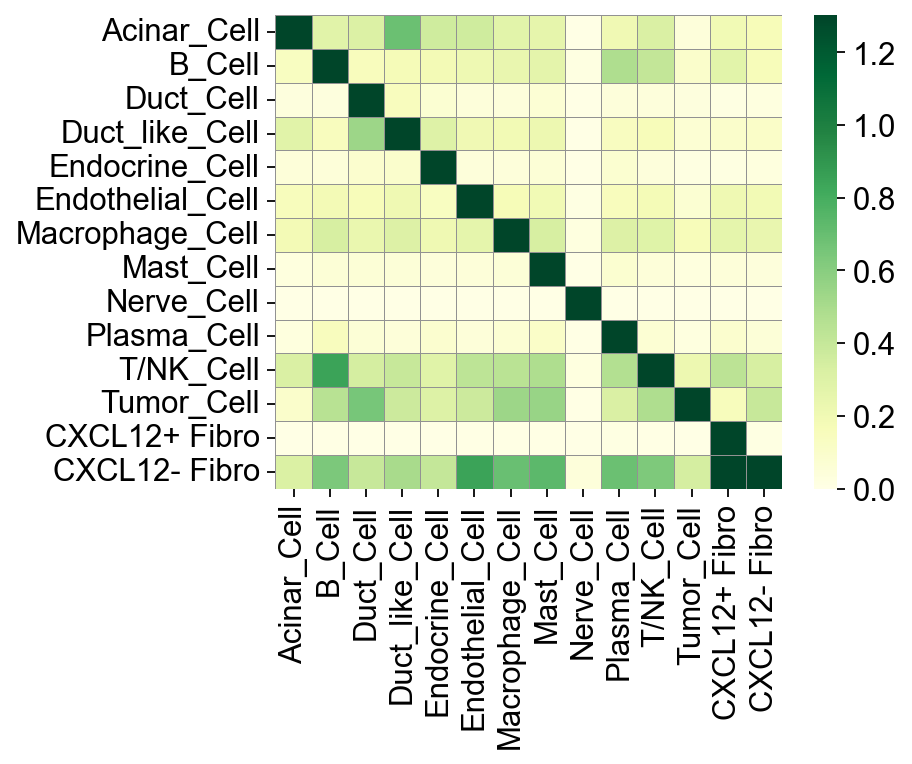

In [70]:
celltype_new_number = adata.obs['celltype_new'].value_counts()[adata.obs['celltype_new'].cat.categories]
nhood_counts = pd.DataFrame(adata.uns['celltype_new_nhood_enrichment']['count'], index=adata.obs['celltype_new'].cat.categories, columns=adata.obs['celltype_new'].cat.categories)
nhood_percents = nhood_counts/celltype_new_number
df = nhood_percents.copy()
index_list = df.index.tolist()
# Remove the numbers on the diagonal
df = df.mask(np.eye(len(df), dtype=bool))
# the numbers on the diagonal equal to max value in the matrix
df = df.mask(np.eye(len(df), dtype=bool), df.max().max())
# zscore df
# df = (df - df.mean()) / df.std()
import seaborn as sns
fig,ax = plt.subplots(figsize=(6,5))
g = sns.heatmap(df,cmap='YlGn',linewidth=.3,linecolor='#929292',ax=ax)
# set the NA value as grey color
ax.set_facecolor('#dcdcdc')
plt.savefig('region_nhood_heatmap.pdf', dpi=300 ,bbox_inches='tight')


In [71]:
nhood_percents

,Acinar_Cell,B_Cell,Duct_Cell,Duct_like_Cell,Endocrine_Cell,Endothelial_Cell,Macrophage_Cell,Mast_Cell,Nerve_Cell,Plasma_Cell,T/NK_Cell,Tumor_Cell,CXCL12+ Fibro,CXCL12- Fibro
Acinar_Cell,2.308444,0.280687,0.311558,0.687183,0.362031,0.365442,0.276445,0.258687,0.002506,0.202843,0.323065,0.045475,0.194544,0.166652
B_Cell,0.136418,0.739001,0.152042,0.173636,0.185637,0.212569,0.241531,0.266179,0.016880,0.479798,0.408713,0.099146,0.276936,0.162679
Duct_Cell,0.034568,0.034710,0.642615,0.144815,0.074586,0.041768,0.039560,0.062603,0.002769,0.044362,0.037877,0.032990,0.014329,0.022885
Duct_like_Cell,0.282458,0.146849,0.536486,1.220660,0.296005,0.200807,0.190482,0.218790,0.003165,0.141133,0.161070,0.069364,0.100579,0.108215
Endocrine_Cell,0.047973,0.050613,0.089078,0.095426,1.621246,0.042237,0.040963,0.057226,0.000527,0.077047,0.037996,0.018235,0.016809,0.028043
Endothelial_Cell,0.155895,0.186579,0.160589,0.208405,0.135973,0.429875,0.169485,0.194935,0.011473,0.147729,0.183076,0.072772,0.204464,0.188804
Macrophage_Cell,0.184020,0.330810,0.237341,0.308481,0.205776,0.264469,0.576785,0.330943,0.021364,0.307728,0.290550,0.161254,0.259576,0.241090
Mast_Cell,0.026820,0.056781,0.058498,0.055185,0.044773,0.047375,0.051543,0.099375,0.002506,0.079917,0.049639,0.025903,0.046569,0.039723
Nerve_Cell,0.000091,0.001255,0.000902,0.000278,0.000144,0.000972,0.001160,0.000873,4.203350,0.001517,0.000744,0.000130,0.000000,0.000845
Plasma_Cell,0.029307,0.142633,0.057767,0.049609,0.084008,0.050034,0.066792,0.111372,0.006066,0.989676,0.066795,0.021279,0.090659,0.052269


Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:03)
Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['celltype_new_nhood_enrichment']`
Finish (0:00:07)
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:05)
Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['celltype_new_nhood_enrichment']`
Finish (0:00:11)
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:04)
Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['celltype_new_nhood_enrichment']`
Finish (0:00:07)
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:04)
Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['celltype_new_nhood_enrichment']`
Finish (0:00:09)
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:05)
Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['celltype_new_nhood_enrichment']`
Finish (0:00:11)
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:06)
Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['celltype_new_nhood_enrichment']`
Finish (0:00:13)
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:05)
Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['celltype_new_nhood_enrichment']`
Finish (0:00:11)
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:06)
Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['celltype_new_nhood_enrichment']`
Finish (0:00:14)
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:06)
Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['celltype_new_nhood_enrichment']`
Finish (0:00:13)
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:06)
Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['celltype_new_nhood_enrichment']`
Finish (0:00:14)
Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:06)
Calculating neighborhood enrichment using `1` core(s)


  0%|          | 0/1000 [00:00<?, ?/s]

Adding `adata.uns['celltype_new_nhood_enrichment']`
Finish (0:00:13)


meta NOT subset; don't know how to subset; dropped


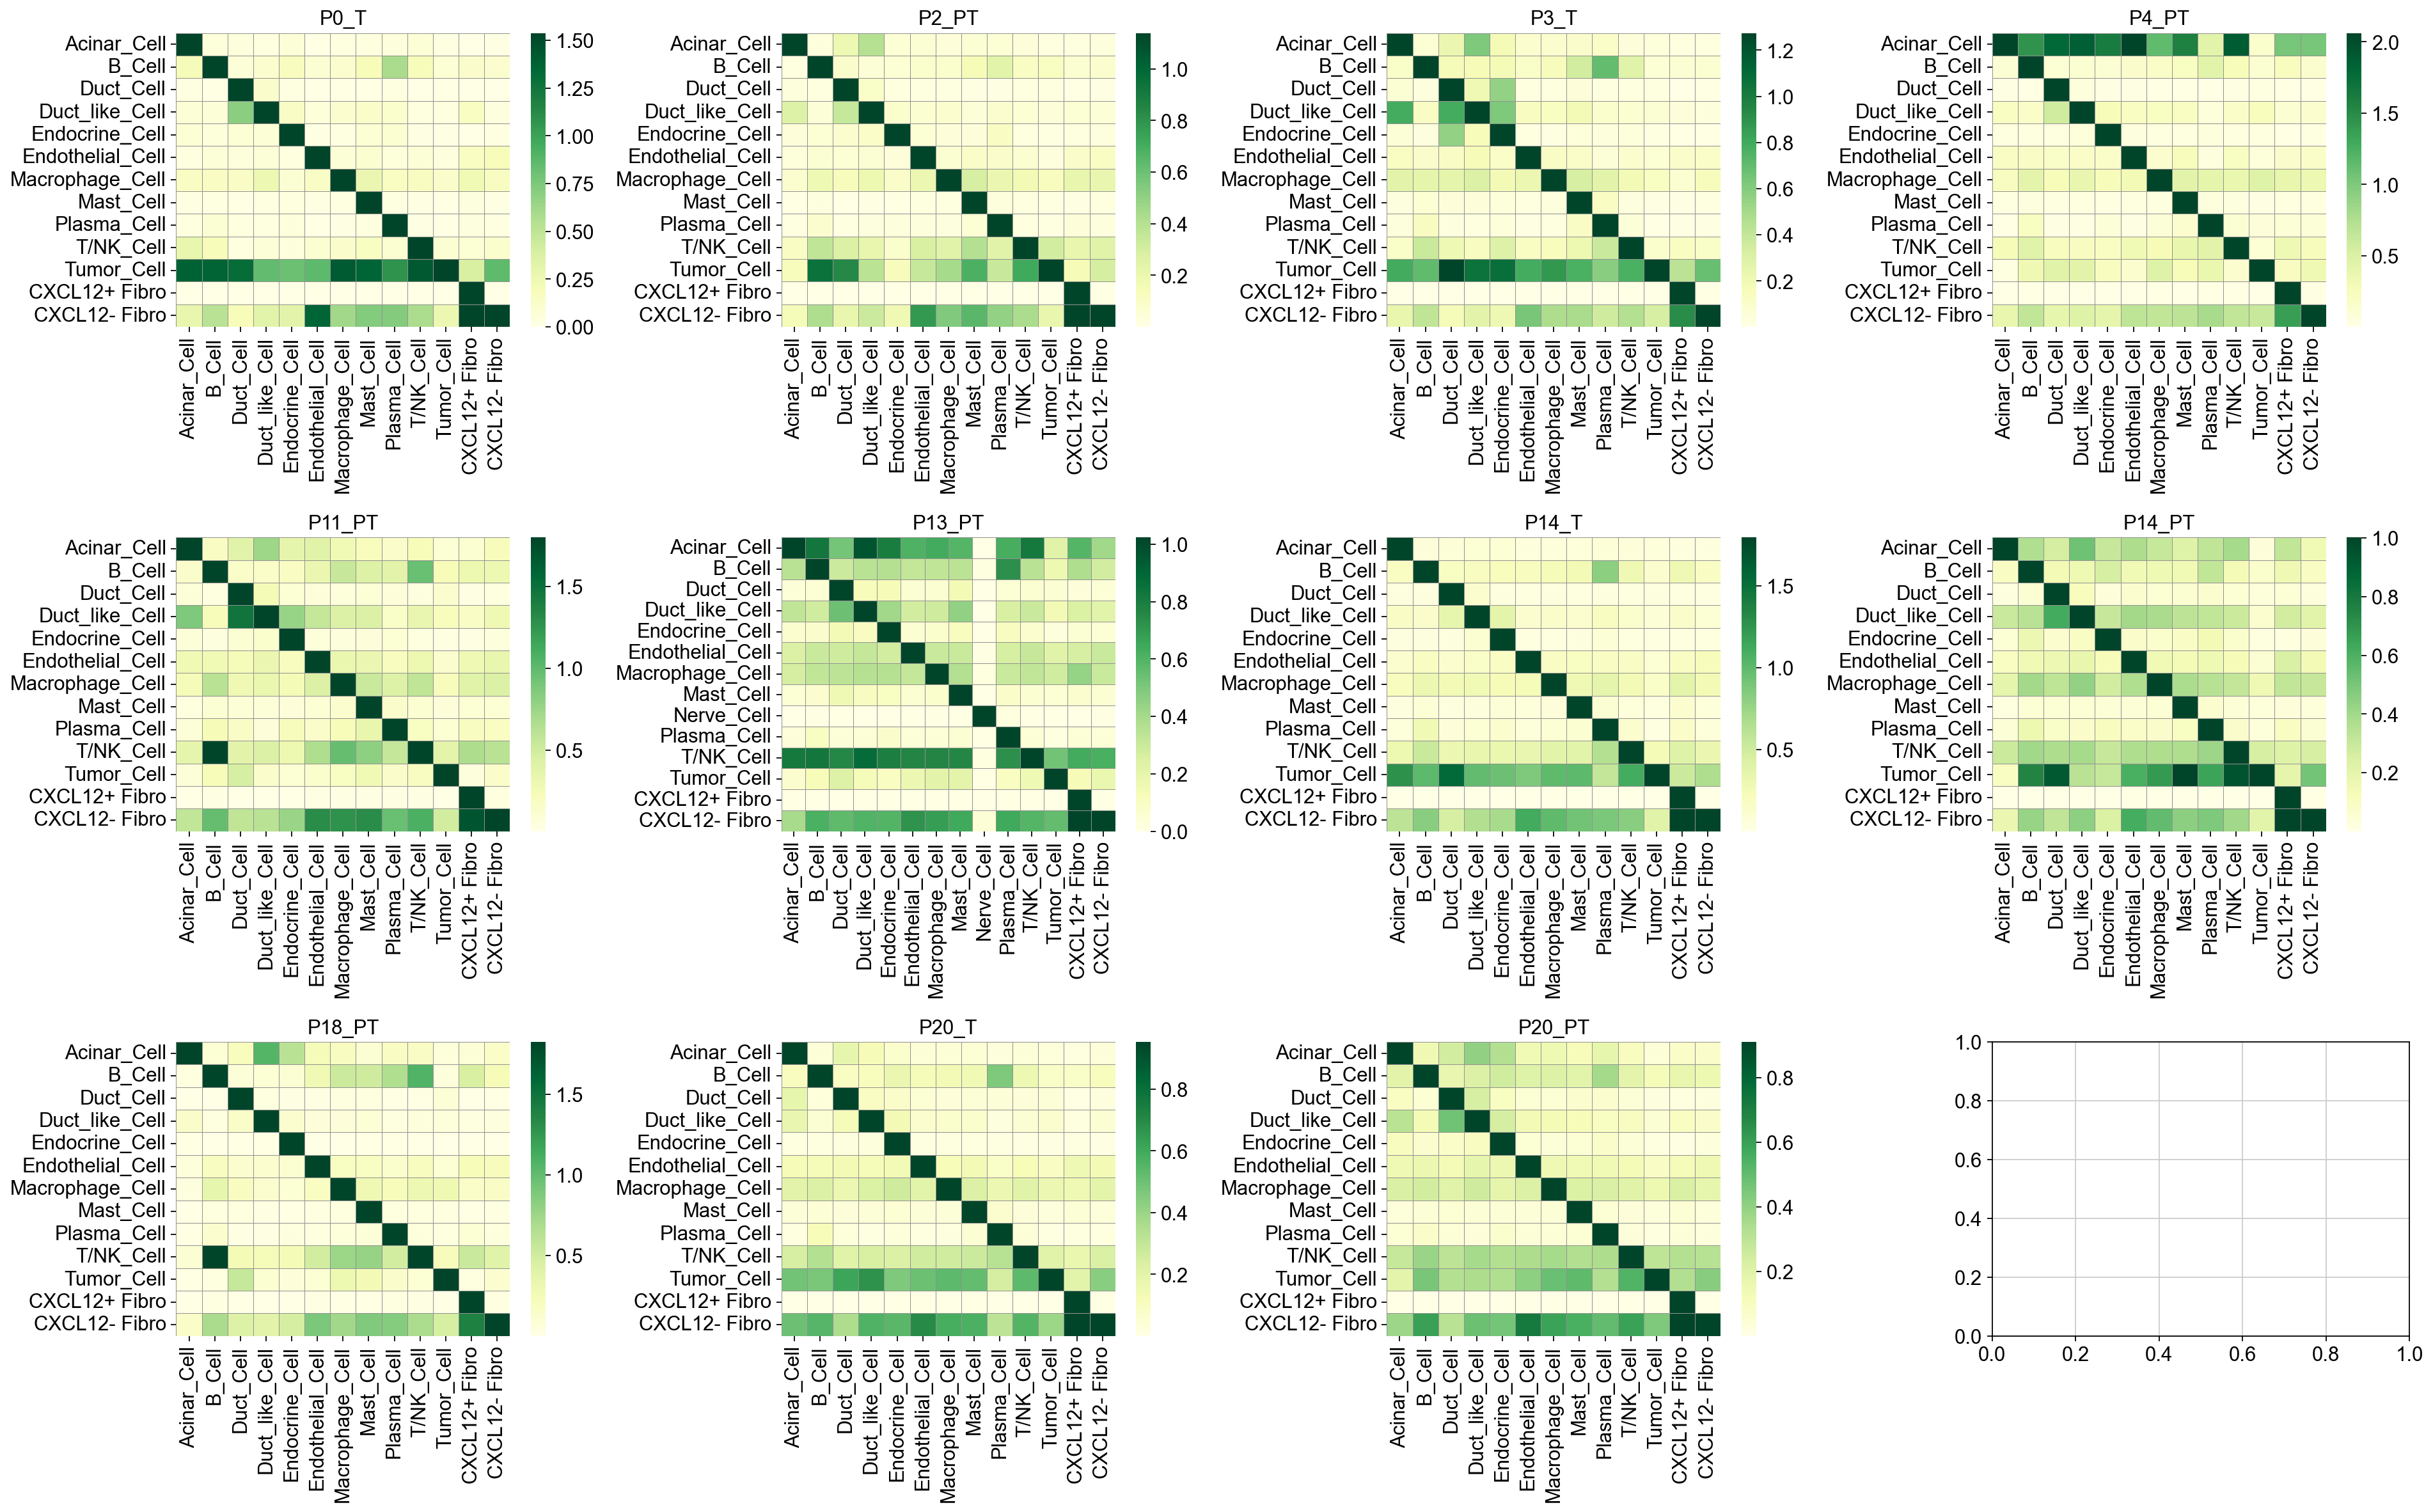

In [67]:
# plot celltype nhood heatmap for each sample 
fig,ax = plt.subplots(3,4,figsize=(24,15))
# rename 'PVL_Cell' to 'Fibroblast_Cell'
import seaborn as sns
for i,sample in enumerate(samplelist):
    axi = ax.flatten()[i]
    adata_tmp = adata[adata.obs['batch'] == sample].copy()
    sq.gr.spatial_neighbors(adata_tmp,coord_type='generic',radius=50)
    sq.gr.nhood_enrichment(adata_tmp, cluster_key="celltype_new")
    score = adata_tmp.uns['celltype_new_nhood_enrichment']['zscore']
    adata_tmp.uns['celltype_new_nhood_enrichment']['zscore'] = np.nan_to_num(score)
    celltype_new_number = adata_tmp.obs['celltype_new'].value_counts()[adata_tmp.obs['celltype_new'].cat.categories]
    nhood_counts = pd.DataFrame(adata_tmp.uns['celltype_new_nhood_enrichment']['count'], index=adata_tmp.obs['celltype_new'].cat.categories, columns=adata_tmp.obs['celltype_new'].cat.categories)
    nhood_percents = nhood_counts/celltype_new_number
    df = nhood_percents.copy()
    index_list = df.index.tolist()
    # Remove the numbers on the diagonal
    df = df.mask(np.eye(len(df), dtype=bool))
    # the numbers on the diagonal equal to max value in the matrix
    df = df.mask(np.eye(len(df), dtype=bool), df.max().max())
    # zscore df
    # df = (df - df.mean()) / df.std()
    import seaborn as sns
    g = sns.heatmap(df,cmap='YlGn',linewidth=.3,linecolor='#929292',ax=axi)
    # set title
    axi.set_title(sample_dict[sample])
plt.savefig(f'cxcl12_nhood_heatmap.pdf', dpi=300 ,bbox_inches='tight')

In [81]:
adata_subset = adata[adata.obs['celltype'].isin(['Fibroblast_Cell','T/NK_Cell'])].copy()

connectivities = adata_subset.obsp['spatial_connectivities']

# 获取细胞类型为'T/NK_Cell'的细胞的索引
tnk_cell_indices = np.where(adata_subset.obs['celltype'] == 'T/NK_Cell')[0]

fibroblast_indices = []

# 遍历T/NK_Cell细胞的索引
for tnk_index in tnk_cell_indices:
    # 找到与T/NK_Cell细胞连接的细胞的索引
    connected_indices = connectivities[tnk_index].indices
    
    # 检查连接的细胞是否为Fibroblast_Cell
    for connected_index in connected_indices:
        if adata_subset.obs['celltype'][connected_index] == 'Fibroblast_Cell':
            fibroblast_indices.append(connected_index)

# 现在，fibroblast_indices中包含了与'T/NK_Cell'细胞连接的Fibroblast_Cell的索引
# 您可以根据这些索引从adata_subset中获取相应的数据
fibroblast_cells = adata_subset[fibroblast_indices, :]
adata_CAF = adata[adata.obs['celltype'].isin(['Fibroblast_Cell'])].copy()
adata_CAF.obs['T/NK_conn'] = 'no'
adata_CAF.obs.loc[fibroblast_cells.obs_names,'T/NK_conn'] = 'yes'
adata_CAF.obs['T/NK_conn'].value_counts()

In [ ]:
adata_CAF.obs['T/NK_conn'].value_counts()

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


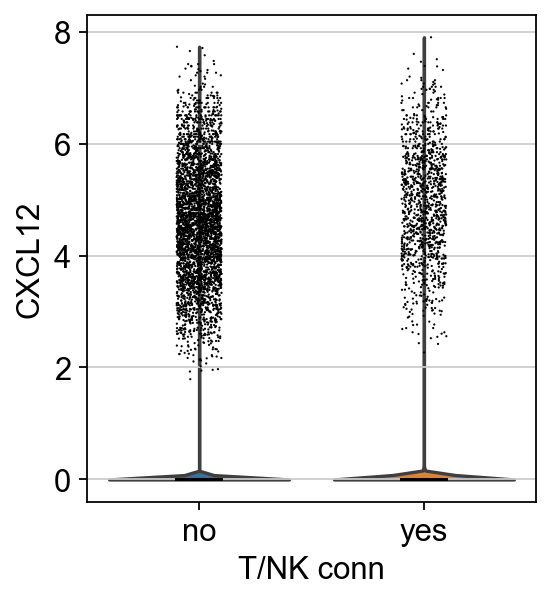

In [89]:
# adata_CAF = adata[adata.obs['celltype'].isin(['Fibroblast_Cell'])].copy()
# adata_CAF.obs['T/NK_conn'] = 'no'
# adata_CAF.obs.loc[fibroblast_cells.obs_names,'T/NK_conn'] = 'yes'
# adata_CAF.obs['T/NK_conn'].value_counts()
sc.pl.violin(adata_CAF,'CXCL12',groupby='T/NK_conn',log=False)
# draw box plot for CXCL12 expression in T/NK_conn and no T/NK_conn
fig,ax = plt.subplots(figsize=(4,4))
sns.boxplot(x='T/NK_conn',y='CXCL12',data=adata_CAF.obs,ax=ax)